Base Code by Vin Busquet from Introduction to OpenCV. 

# Intro to OpenCV in Python
### This notebook will take you through basics - how to read an image, open an image, display it and understanding colorflags

### To install openCV, open Anaconda Prompt and type 

pip install opencv-python

In [2]:
#importing necessary modules and libraries
import cv2 #opencv itself
import numpy as np #for matrix manipulations

%matplotlib inline
from matplotlib import pyplot as plt #this lets you draw inline pictures in the notebook
import pylab #this allows you to control figure size
pylab.rcParams["figure.figsize"] = (10.0,8.0) #controls figure size in the notebook

In [3]:
img = cv2.imread("Images/2.jpg")

In [4]:
#let's find various things about that image
print(img.size) #gives you the size of the image array
print(img.shape) #gives a tuple of row(height),column(width) and color channel
print(img.dtype) #gives a numPy data type of uint8 - meaning unsigned integer(0 to 255)


2250000
(750, 1000, 3)
uint8


In [5]:
#let's look at image.shape closely
print(type(img.shape))

<class 'tuple'>


In [6]:
#assigning variables to height and width of the image
h,w,c = img.shape
print("width:",w)
print("height:",h)
print("color:",c)

width: 1000
height: 750
color: 3


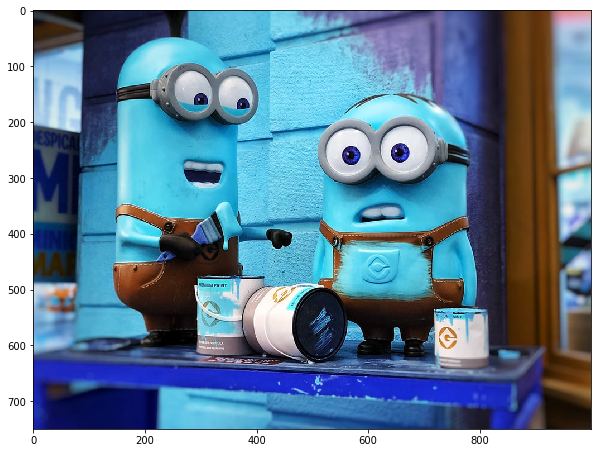

In [7]:
#let's try to display the image using the pyplot module
plt.imshow(img)


### Notice the color of the image above. This is because openCV uses BGR format to store images
### OpenCv has built in color flags to change from one to another

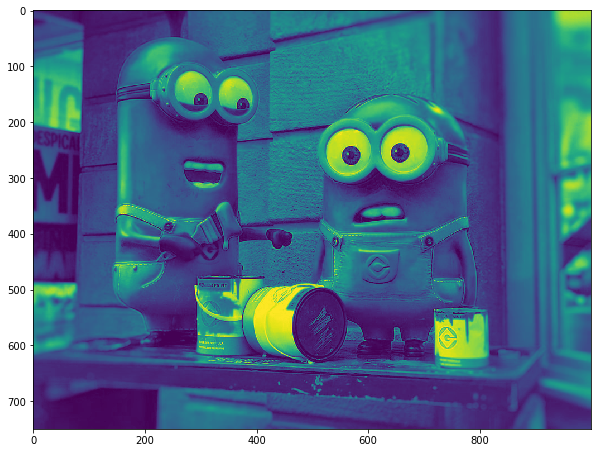

In [8]:
#splitting color channels
b,g,r = cv2.split(img)
plt.imshow(b)

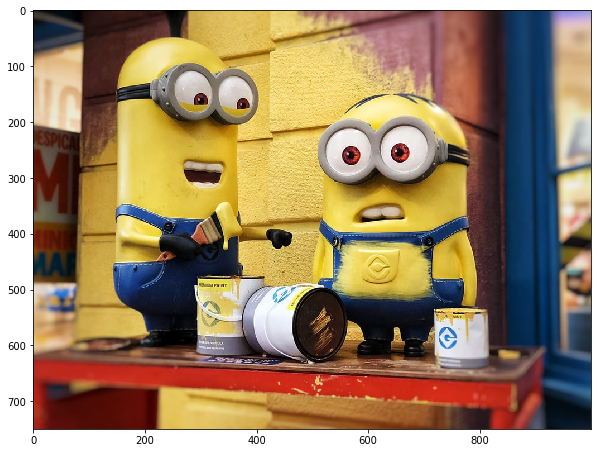

In [9]:
#conventional way to change bgr image to rgb
#splitting and merging

b,g,r = cv2.split(img)
merged_image = cv2.merge([r,g,b])
plt.imshow(merged_image)

In [10]:
#converting color channels using color flags of openCv
#Lets see all the colorflags available

COLORflags = [flag for flag in dir(cv2) if flag.startswith("COLOR")]
print(len(COLORflags))
#print(COLORflags)

295


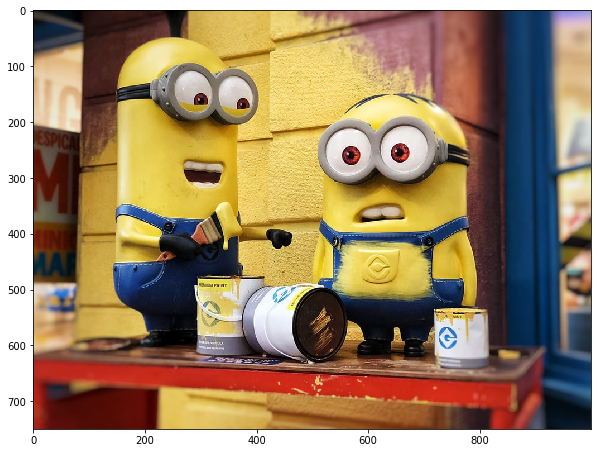

In [11]:
#using the cvtColor() function to change color space
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

### Let's start working with pixels; looking at them, getting image data and setting image data

In [12]:
#images are represented as numPy arrays
#any pixel in the image can be accessed by calling [row,column]
pixel = rgb_img[700,150]
print(pixel)

[84 11  4]


In [13]:
#reversely, you can set an pixel to a desired value
rgb_img[400,100] = (0,0,0)
print(rgb_img[400,100])

[0 0 0]


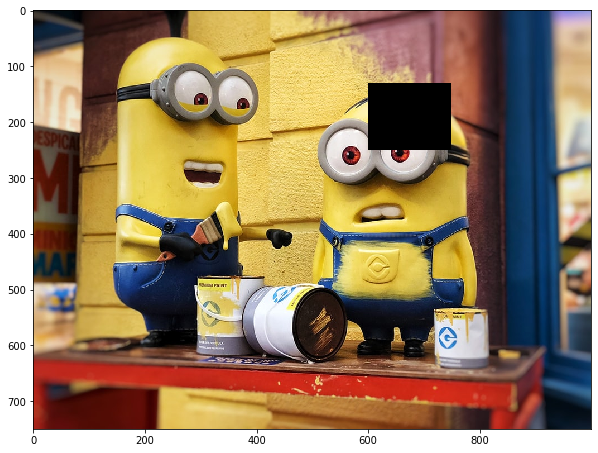

In [14]:
#what if you want to set multiple pixels to something else
#you can call on multiple pixels using slicing
# [top y: bottom y, left x:right x]

rgb_img[130:250, 600:750] = [0,0,0]
plt.imshow(rgb_img)

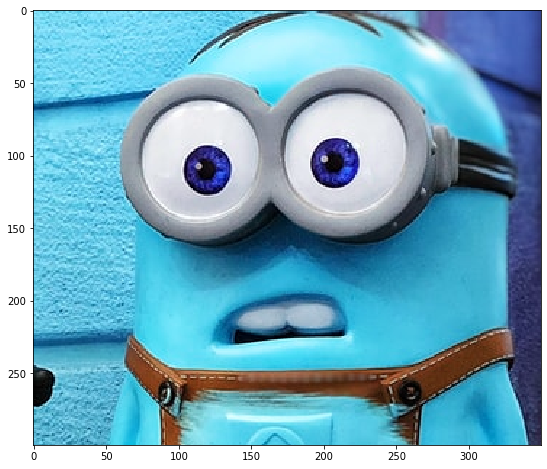

In [15]:
#Cropping images would work similarly
minion_face = img[150:450, 450:800]
plt.imshow(minion_face)

## This next part introduces some simple stats, smoothing and basic image processing

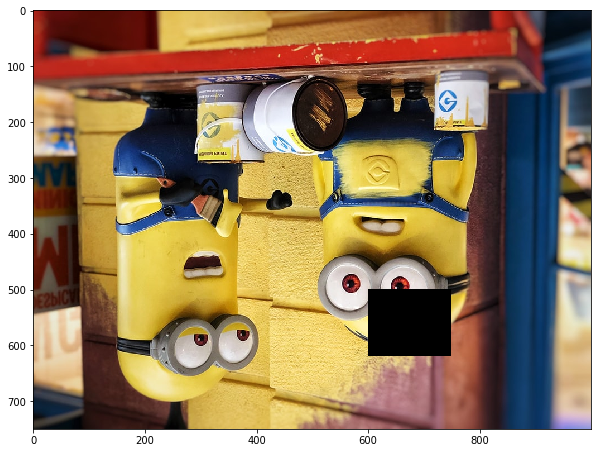

In [16]:
#Basic Manipulations like rotate, flip, transpose, etc

#verticle flip
flip_1 = cv2.flip(rgb_img,0)
plt.imshow(flip_1)

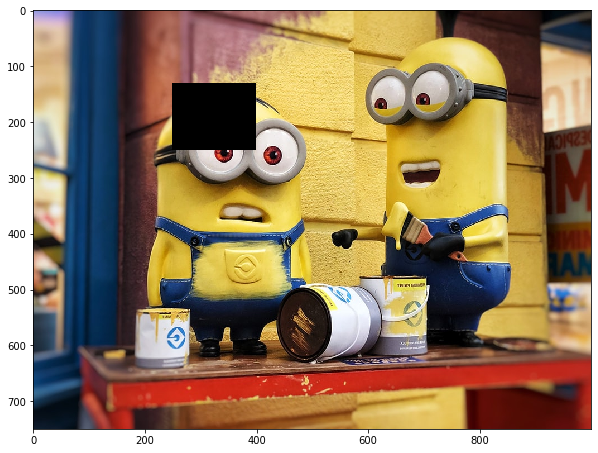

In [17]:
#horizontal flip
flip_2 = cv2.flip(rgb_img,1)
plt.imshow(flip_2)

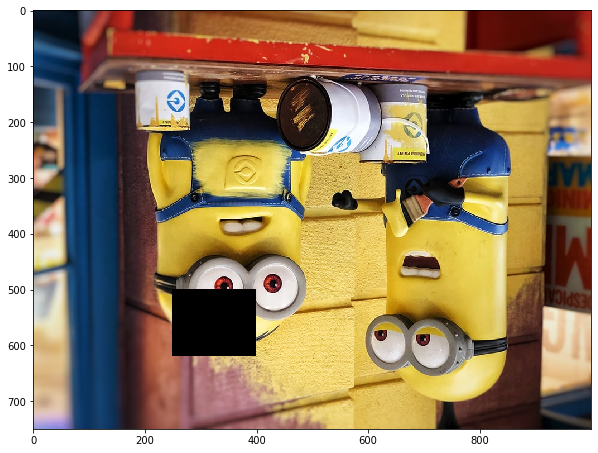

In [18]:
#rotate image
rotate = cv2.rotate(rgb_img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rotate)

rotate = cv2.rotate(rgb_img, cv2.ROTATE_180)
plt.imshow(rotate)

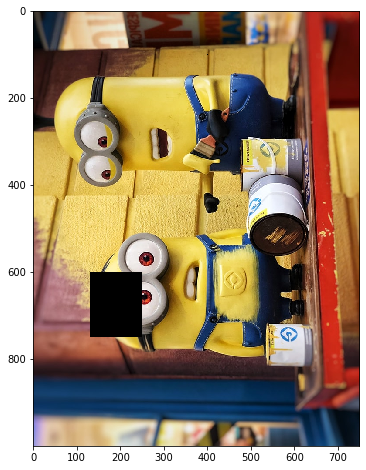

In [19]:
transposed=cv2.transpose(rgb_img)
plt.imshow(transposed)

### Doing arithmetic operations on images
OpenCV has a lot of functions for doing mathematics on images. Some of these have "analogous" numpy alternatives, but it is nearly always better to use the OpenCV version. The reason for this that OpenCV is designed to work on images and so handles overflow better (OpenCV add, for example, truncates to 255 if the datatype is image-like and 8 bit; Numpy's alternative wraps around).

Useful arithmetic operations include add and addWeighted, which combine two images that are the same size.

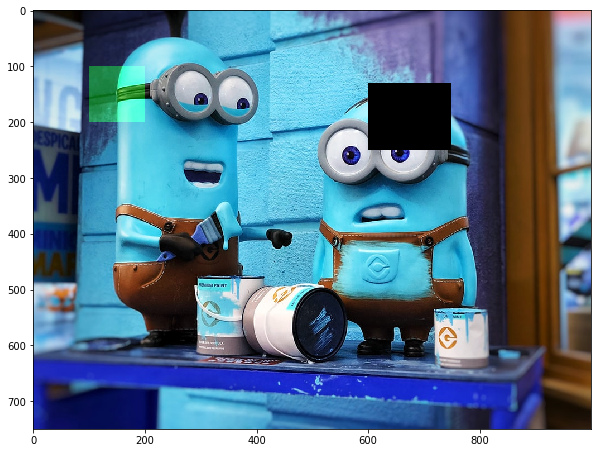

In [21]:
#first create an image the same size as our input
#numpy.zeroes returns a new array of given shape and type, filled with zeros.
blank_image = np.zeros((rgb_img.shape),np.uint8)

#give it a green square
blank_image[100:200,100:200,1]=100;


#lets add the two images
new_img = cv2.add(rgb_img,blank_image)

plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

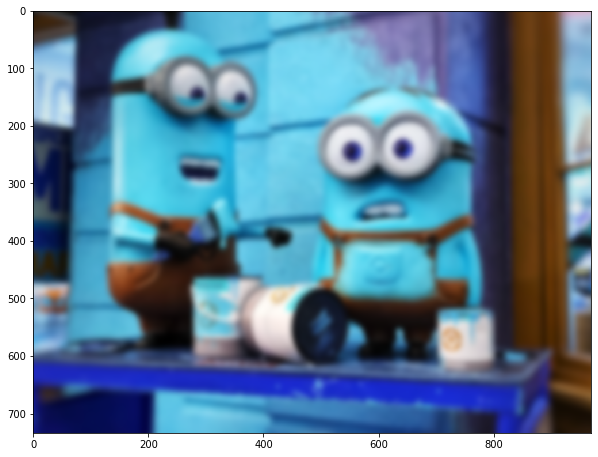

In [23]:
#Noise reduction and blurring/smoothing using Gaussian kernel

d=15
img_blur = cv2.GaussianBlur(img,(2*d+1,2*d+1),-1)[d:-1,d:-d]
plt.imshow(img_blur)